### Voronyi-Stepan-Camp-2025

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
data = pd.read_csv(r'C:\Users\Stepan\Stepan-Voronyi-Camp-2025\Lesson 12\datasets\Iris.csv', index_col='Id')
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [40]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

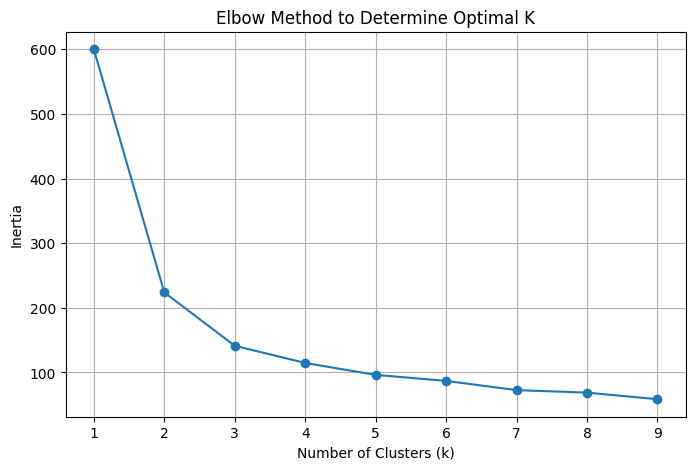

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

In [43]:
fig1 = px.scatter(data,x='SepalLengthCm',y='SepalWidthCm',
color='Species',title='Sepal Length vs Sepal Width by Species',labels={'SepalLengthCm': 'Sepal Length (cm)', 'SepalWidthCm': 'Sepal Width (cm)'}
)
fig1.show()
fig2 = px.scatter(data,x='SepalLengthCm',y='SepalWidthCm',
color=data['cluster'].astype(str),  title='Sepal Length vs Sepal Width by Cluster',labels={'SepalLengthCm': 'Sepal Length (cm)', 'SepalWidthCm': 'Sepal Width (cm)', 'color': 'Cluster'}
)
fig2.show()